<a href="https://colab.research.google.com/github/simecek/dspracticum2023/blob/main/lesson12/Exercise_Predicting_Wikipedia_Web_Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -qq prophet gdown

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import datetime
import warnings
import gdown

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from prophet import Prophet

## Import Data From Google Drive

In [ ]:
# https://www.kaggle.com/c/web-traffic-time-series-forecasting
# NaN changed to zero, test dataset reshaped

gdown.download(id="1-1HQVh-nVfNj1to2DW2Rpyfv5xFQqlpa", output="./train.pkl")
gdown.download(id="1hoRCIko7XD73WDVSMCNJUYMSjWwQaeKr", output="./test.pkl")

In [ ]:
!ls -hl

total 975M
drwx------ 6 root root 4.0K Oct 21 06:34 drive
drwxr-xr-x 1 root root 4.0K Oct  8 13:45 sample_data
-rw-r--r-- 1 root root  78M Oct 21 06:48 test.pkl
-rw-r--r-- 1 root root 898M Oct 21 06:51 train.pkl


In [ ]:
train = pd.read_pickle("train.pkl")
test = pd.read_pickle("test.pkl")

In [ ]:
train.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,...,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
Page,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
!vote_en.wikipedia.org_all-access_all-agents,3.0,4.0,7.0,4.0,4.0,2.0,3.0,7.0,2.0,0.0,3.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,0.0,6.0,8.0,5.0,1.0,2.0,1.0,2.0,10.0,4.0,6.0,4.0,2.0,1.0,4.0,1.0,2.0,0.0,0.0,1.0,0.0,...,11.0,8.0,7.0,13.0,8.0,15.0,11.0,11.0,19.0,19.0,14.0,13.0,14.0,8.0,12.0,11.0,9.0,8.0,5.0,16.0,6.0,23.0,12.0,16.0,8.0,19.0,18.0,6.0,11.0,15.0,16.0,12.0,10.0,7.0,11.0,8.0,5.0,15.0,6.0,9.0
!vote_en.wikipedia.org_all-access_spider,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,9.0,3.0,0.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,6.0,5.0,9.0,7.0,2.0,0.0,2.0,0.0,1.0,3.0,1.0,0.0,2.0,2.0,2.0,2.0,0.0
!vote_en.wikipedia.org_desktop_all-agents,3.0,4.0,7.0,4.0,4.0,2.0,3.0,7.0,2.0,0.0,3.0,1.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,5.0,8.0,4.0,1.0,1.0,1.0,2.0,10.0,3.0,6.0,3.0,2.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,...,6.0,7.0,1.0,5.0,2.0,4.0,3.0,6.0,12.0,13.0,6.0,5.0,6.0,4.0,5.0,4.0,3.0,4.0,0.0,5.0,3.0,16.0,7.0,12.0,6.0,12.0,12.0,4.0,1.0,4.0,8.0,6.0,4.0,5.0,4.0,2.0,2.0,9.0,3.0,3.0
"""Awaken,_My_Love!""_en.wikipedia.org_all-access_all-agents",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1659.0,1518.0,1685.0,1448.0,1668.0,1737.0,1609.0,1812.0,1569.0,1508.0,1417.0,1463.0,1473.0,1426.0,1364.0,1337.0,1355.0,1241.0,1356.0,1289.0,1258.0,1268.0,1208.0,1184.0,1045.0,1127.0,1102.0,1192.0,1155.0,1093.0,1090.0,1090.0,1100.0,1164.0,1047.0,1144.0,1092.0,1065.0,978.0,972.0
"""Awaken,_My_Love!""_en.wikipedia.org_all-access_spider",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,14.0,16.0,14.0,17.0,22.0,15.0,16.0,14.0,24.0,14.0,16.0,36.0,20.0,26.0,12.0,14.0,9.0,17.0,10.0,14.0,24.0,25.0,36.0,12.0,28.0,37.0,29.0,31.0,12.0,30.0,30.0,29.0,34.0,24.0,14.0,18.0,30.0,20.0,18.0


In [ ]:
test.head()

JustDate,2017-09-13,2017-09-14,2017-09-15,2017-09-16,2017-09-17,2017-09-18,2017-09-19,2017-09-20,2017-09-21,2017-09-22,2017-09-23,2017-09-24,2017-09-25,2017-09-26,2017-09-27,2017-09-28,2017-09-29,2017-09-30,2017-10-01,2017-10-02,2017-10-03,2017-10-04,2017-10-05,2017-10-06,2017-10-07,2017-10-08,2017-10-09,2017-10-10,2017-10-11,2017-10-12,2017-10-13,2017-10-14,2017-10-15,2017-10-16,2017-10-17,2017-10-18,2017-10-19,2017-10-20,2017-10-21,2017-10-22,2017-10-23,2017-10-24,2017-10-25,2017-10-26,2017-10-27,2017-10-28,2017-10-29,2017-10-30,2017-10-31,2017-11-01,2017-11-02,2017-11-03,2017-11-04,2017-11-05,2017-11-06,2017-11-07,2017-11-08,2017-11-09,2017-11-10,2017-11-11,2017-11-12,2017-11-13
JustPage,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
!vote_en.wikipedia.org_all-access_all-agents,9.0,9.0,6.0,13.0,11.0,10.0,13.0,6.0,12.0,15.0,12.0,2.0,7.0,8.0,5.0,3.0,4.0,6.0,7.0,7.0,5.0,4.0,6.0,6.0,5.0,1.0,4.0,3.0,7.0,9.0,5.0,3.0,1.0,5.0,4.0,4.0,4.0,4.0,6.0,8.0,6.0,11.0,4.0,6.0,2.0,6.0,3.0,8.0,8.0,6.0,3.0,5.0,9.0,9.0,6.0,12.0,5.0,4.0,4.0,4.0,5.0,5.0
!vote_en.wikipedia.org_all-access_spider,3.0,1.0,0.0,2.0,0.0,4.0,1.0,1.0,5.0,2.0,9.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,0.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,3.0,0.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,1.0,3.0,2.0,2.0,1.0,3.0,1.0,2.0,2.0,4.0,1.0,1.0,2.0,3.0,1.0,2.0,2.0,1.0,0.0,1.0,1.0,2.0
!vote_en.wikipedia.org_desktop_all-agents,7.0,4.0,3.0,5.0,5.0,6.0,6.0,2.0,8.0,4.0,10.0,2.0,6.0,6.0,3.0,1.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,3.0,3.0,1.0,3.0,0.0,6.0,8.0,4.0,2.0,0.0,4.0,1.0,1.0,1.0,1.0,3.0,5.0,3.0,7.0,3.0,3.0,1.0,4.0,1.0,3.0,5.0,6.0,1.0,4.0,5.0,4.0,2.0,5.0,3.0,2.0,2.0,2.0,2.0,3.0
"""Awaken,_My_Love!""_en.wikipedia.org_all-access_all-agents",1010.0,997.0,976.0,1019.0,1062.0,3777.0,1955.0,1375.0,1161.0,1084.0,1082.0,1093.0,1147.0,1077.0,1001.0,1055.0,1189.0,1036.0,1055.0,1048.0,1018.0,1076.0,971.0,909.0,945.0,908.0,950.0,957.0,856.0,892.0,832.0,858.0,1033.0,949.0,942.0,886.0,860.0,923.0,819.0,853.0,877.0,858.0,904.0,837.0,767.0,684.0,822.0,809.0,810.0,770.0,1283.0,939.0,787.0,868.0,911.0,903.0,828.0,915.0,882.0,832.0,930.0,873.0
"""Awaken,_My_Love!""_en.wikipedia.org_all-access_spider",21.0,26.0,27.0,17.0,32.0,34.0,26.0,22.0,21.0,15.0,24.0,23.0,42.0,20.0,12.0,24.0,17.0,23.0,23.0,22.0,16.0,24.0,32.0,17.0,16.0,13.0,38.0,25.0,30.0,31.0,30.0,22.0,24.0,19.0,25.0,38.0,26.0,42.0,35.0,18.0,17.0,13.0,19.0,21.0,36.0,17.0,36.0,10.0,12.0,9.0,17.0,9.0,14.0,17.0,10.0,14.0,15.0,17.0,11.0,8.0,10.0,42.0


## Small subset of highly accessed pages

In [ ]:
median_visits = train.median(axis = 1)
over100000 = median_visits > 100_000
sum(over100000)

42

In [ ]:
train_filtered = train[over100000].apply(np.log1p).copy()
test_filtered = test[over100000].apply(np.log1p).copy()

In [ ]:
train_filtered.shape, test_filtered.shape

((42, 803), (42, 62))

## Simple Graph

In [ ]:
dropdown_options = list(train_filtered.index.values)
dropdown_options

['Especial:Buscar_es.wikipedia.org_all-access_all-agents',
 'Especial:Buscar_es.wikipedia.org_desktop_all-agents',
 'Main_Page_en.wikipedia.org_all-access_all-agents',
 'Main_Page_en.wikipedia.org_all-access_spider',
 'Main_Page_en.wikipedia.org_desktop_all-agents',
 'Main_Page_en.wikipedia.org_mobile-web_all-agents',
 'Sp?cial:Search_fr.wikipedia.org_all-access_all-agents',
 'Sp?cial:Search_fr.wikipedia.org_desktop_all-agents',
 'Special:Book_en.wikipedia.org_all-access_all-agents',
 'Special:Book_en.wikipedia.org_desktop_all-agents',
 'Special:Search_commons.wikimedia.org_all-access_all-agents',
 'Special:Search_commons.wikimedia.org_desktop_all-agents',
 'Special:Search_en.wikipedia.org_all-access_all-agents',
 'Special:Search_en.wikipedia.org_desktop_all-agents',
 'Special:Search_en.wikipedia.org_mobile-web_all-agents',
 'Spezial:Suche_de.wikipedia.org_all-access_all-agents',
 'Spezial:Suche_de.wikipedia.org_desktop_all-agents',
 'Spécial:Recherche_fr.wikipedia.org_all-access_all-a

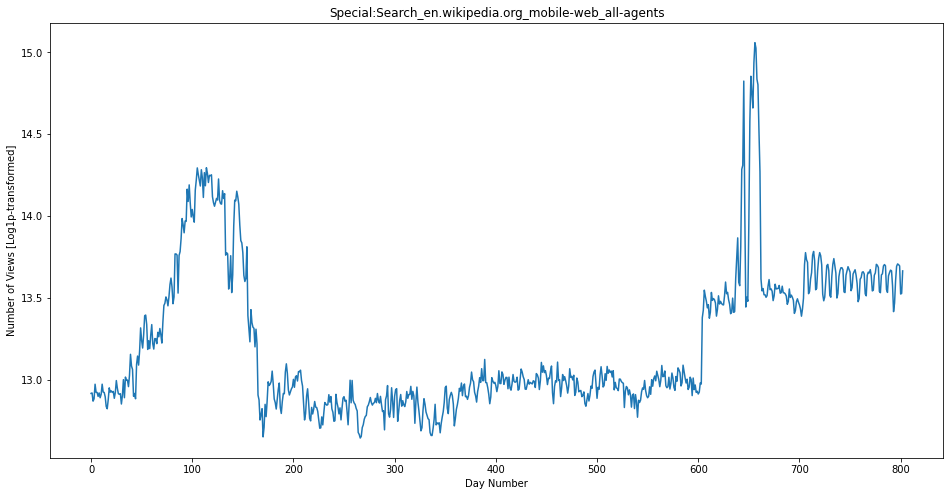

In [ ]:
#dropdown_options = list(train_filtered.index.values)
page = 'Special:Search_en.wikipedia.org_mobile-web_all-agents' #@param {type:"string"}
#print(page)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    train_dropdown = train_filtered.loc[page, :]
    days = range(len(train_dropdown))
    plt.figure(figsize=(16,8))
    plt.plot(days, train_dropdown.values)
    plt.ylabel('Number of Views [Log1p-transformed]')
    plt.xlabel('Day Number')
    plt.title(page)
    plt.show()

## Task 1 - Simple Predictions

Take the data frame `train` and create several data frames with forecasts using some simple method like

*   Median
*   Median per day of the week
*   Copy of the last year or week data

The data frames should have the same size and index as `test`.

In [ ]:
# YOUR CODE HERE

## Task 2 - Calculate average SMAPE

Look at https://www.kaggle.com/c/web-traffic-time-series-forecasting/overview/evaluation for a definition of SMAPE. Write a function that given two data frames (one with forecasts and one with actual values), calculate the average SMAPE. Test it on forecasts from Task 1.

In [ ]:
# YOUR CODE HERE

## Task 3 - Visualization of forecasts

Write a function that given a time series id, plot its training values, forecasts and actual values into one plot. (Optional: can you fit several forecasts into one plot?)

In [ ]:
# YOUR CODE HERE

## Task 4 - STL Decomposition

Decompose each time series with `seasonal_decompose` into a trend, annual seasonality, weekly seasonality and the remainder. Try to make a simple forecast on the decomposed componens of the time series.

In [ ]:
# YOUR CODE HERE

## Task 5 - Exponential Smoothing, ARIMA

Try to use more advanced methods on the decomposed dataset like exponential smoothing or ARIMA.

In [ ]:
# YOUR CODE HERE

## Task 6 - Prophet

Try to apply Prophet method on the original data (before decomposition).

In [ ]:
# YOUR CODE HERE

## Task 7 - Full dataset

Now select one of the forecasting methods above and apply it to the full dataset.

In [ ]:
# YOUR CODE HERE